In [9]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
nominal = Tree("/uscms_data/d3/ekoenig/8BAnalysis/studies/eightbStudies/scripts/feynnet/feynnet_bkg_33sig.root", treename='tree', normalization=None)
mx_reweight = Tree("/uscms_data/d3/ekoenig/8BAnalysis/studies/eightbStudies/scripts/feynnet/feynnet_mx_reweight.root", treename='tree', normalization=None)
mxmy_reweight = Tree("/uscms_data/d3/ekoenig/8BAnalysis/studies/eightbStudies/scripts/feynnet/feynnet_mx_my_reweight.root", treename='tree', normalization=None)

100%|██████████| 1/1 [00:00<00:00, 10.35it/s]


100%|██████████| 6/6 [00:34<00:00,  5.76s/it]


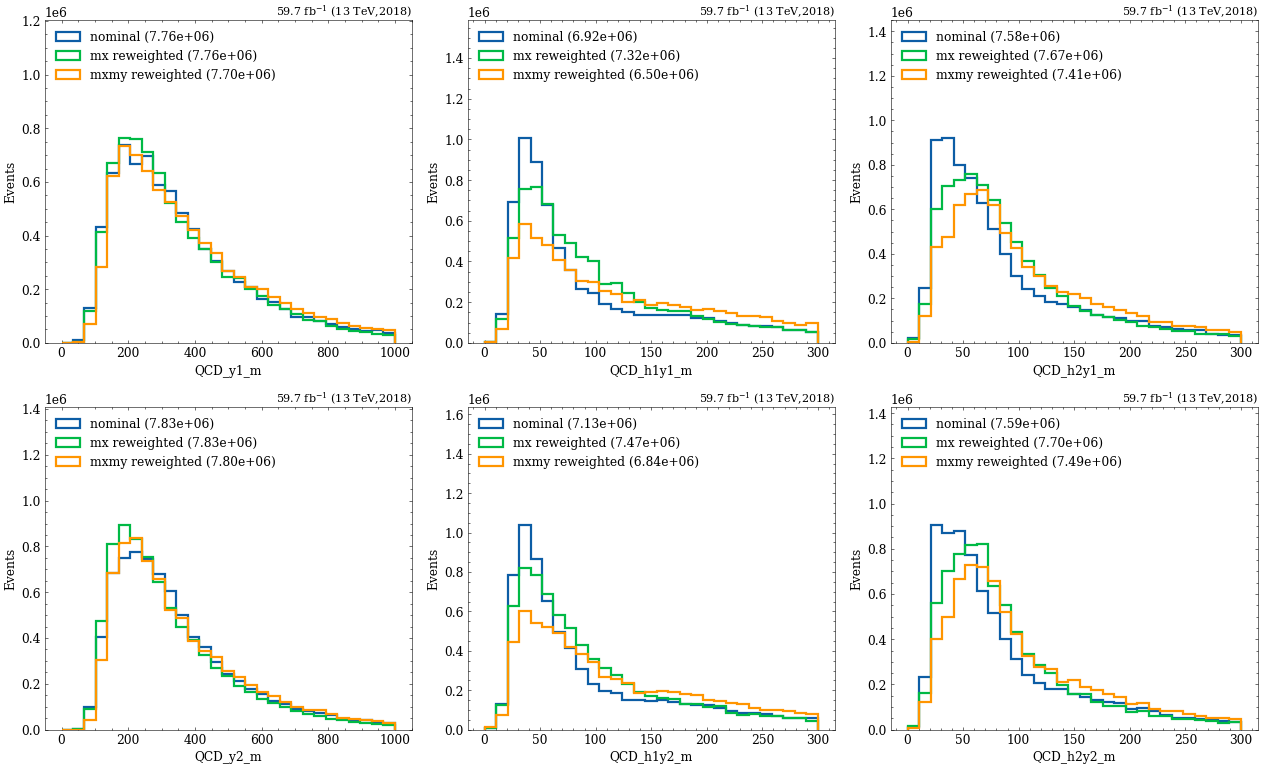

In [11]:
study.h_quick(
    [nominal, mx_reweight, mxmy_reweight],
    label=['nominal','mx reweighted','mxmy reweighted'],
    stacked=False,
    varlist=[f'QCD_y1_m','QCD_h1y1_m','QCD_h2y1_m',f'QCD_y2_m','QCD_h1y2_m','QCD_h2y2_m'],
    dim=(-1,3),
    legend=True,
    errors=False,
)

100%|██████████| 3/3 [00:05<00:00,  1.82s/it]


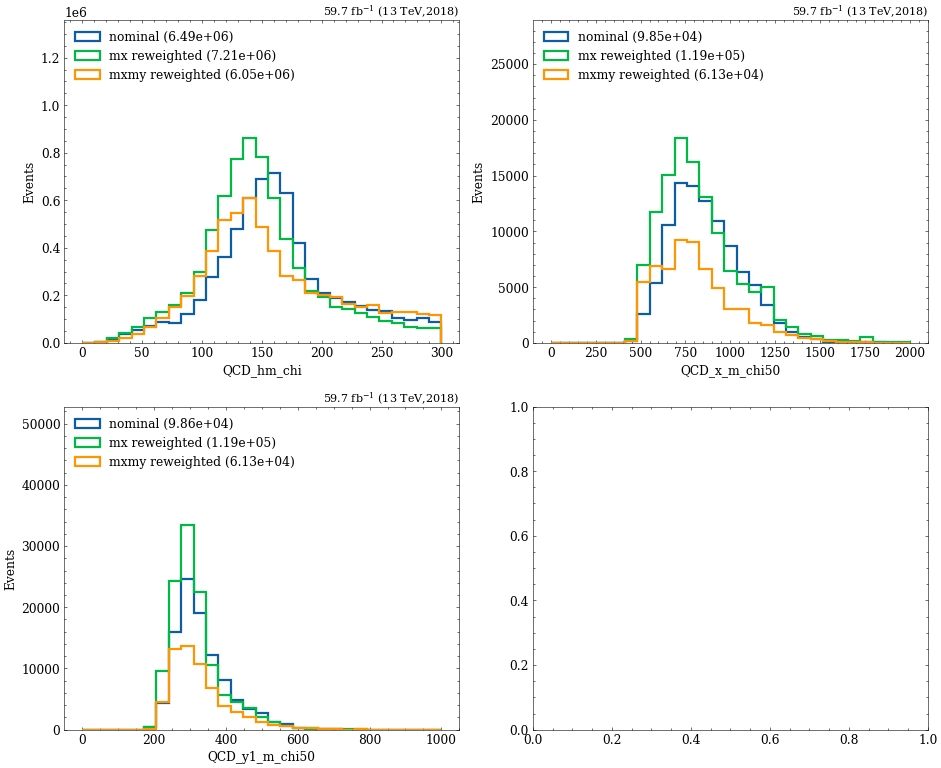

In [14]:
study.h_quick(
    [nominal, mx_reweight, mxmy_reweight],
    label=['nominal','mx reweighted','mxmy reweighted'],
    stacked=False,
    varlist=[f'QCD_hm_chi','QCD_x_m_chi50','QCD_y1_m_chi50'],
    # dim=(-1,3),
    legend=True,
    errors=False,
)

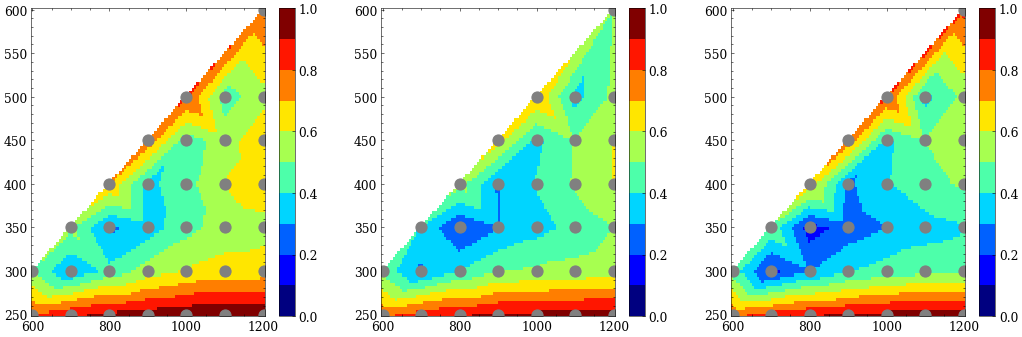

In [3]:
fig, axs = study.get_figax(nvar =3, dim=-1 )

study.mxmy_reduction(
    nominal,
    f_var=lambda t : t.eightb_x_eff,
    zlim=np.linspace(0,1,11),
    g_cmap='jet',
    figax=(fig, axs.flat[0])
)

study.mxmy_reduction(
    mx_reweight,
    f_var=lambda t : t.eightb_x_eff,
    zlim=np.linspace(0,1,11),
    g_cmap='jet',
    figax=(fig, axs.flat[1])
)

study.mxmy_reduction(
    mxmy_reweight,
    f_var=lambda t : t.eightb_x_eff,
    zlim=np.linspace(0,1,11),
    g_cmap='jet',
    figax=(fig, axs.flat[2])
)

In [27]:
masses = list(map(lambda f: re.findall(r'MX_\d+_MY_\d+', f)[0], fc.eightb.feynnet_signal_list))

100%|██████████| 36/36 [00:11<00:00,  3.25it/s]


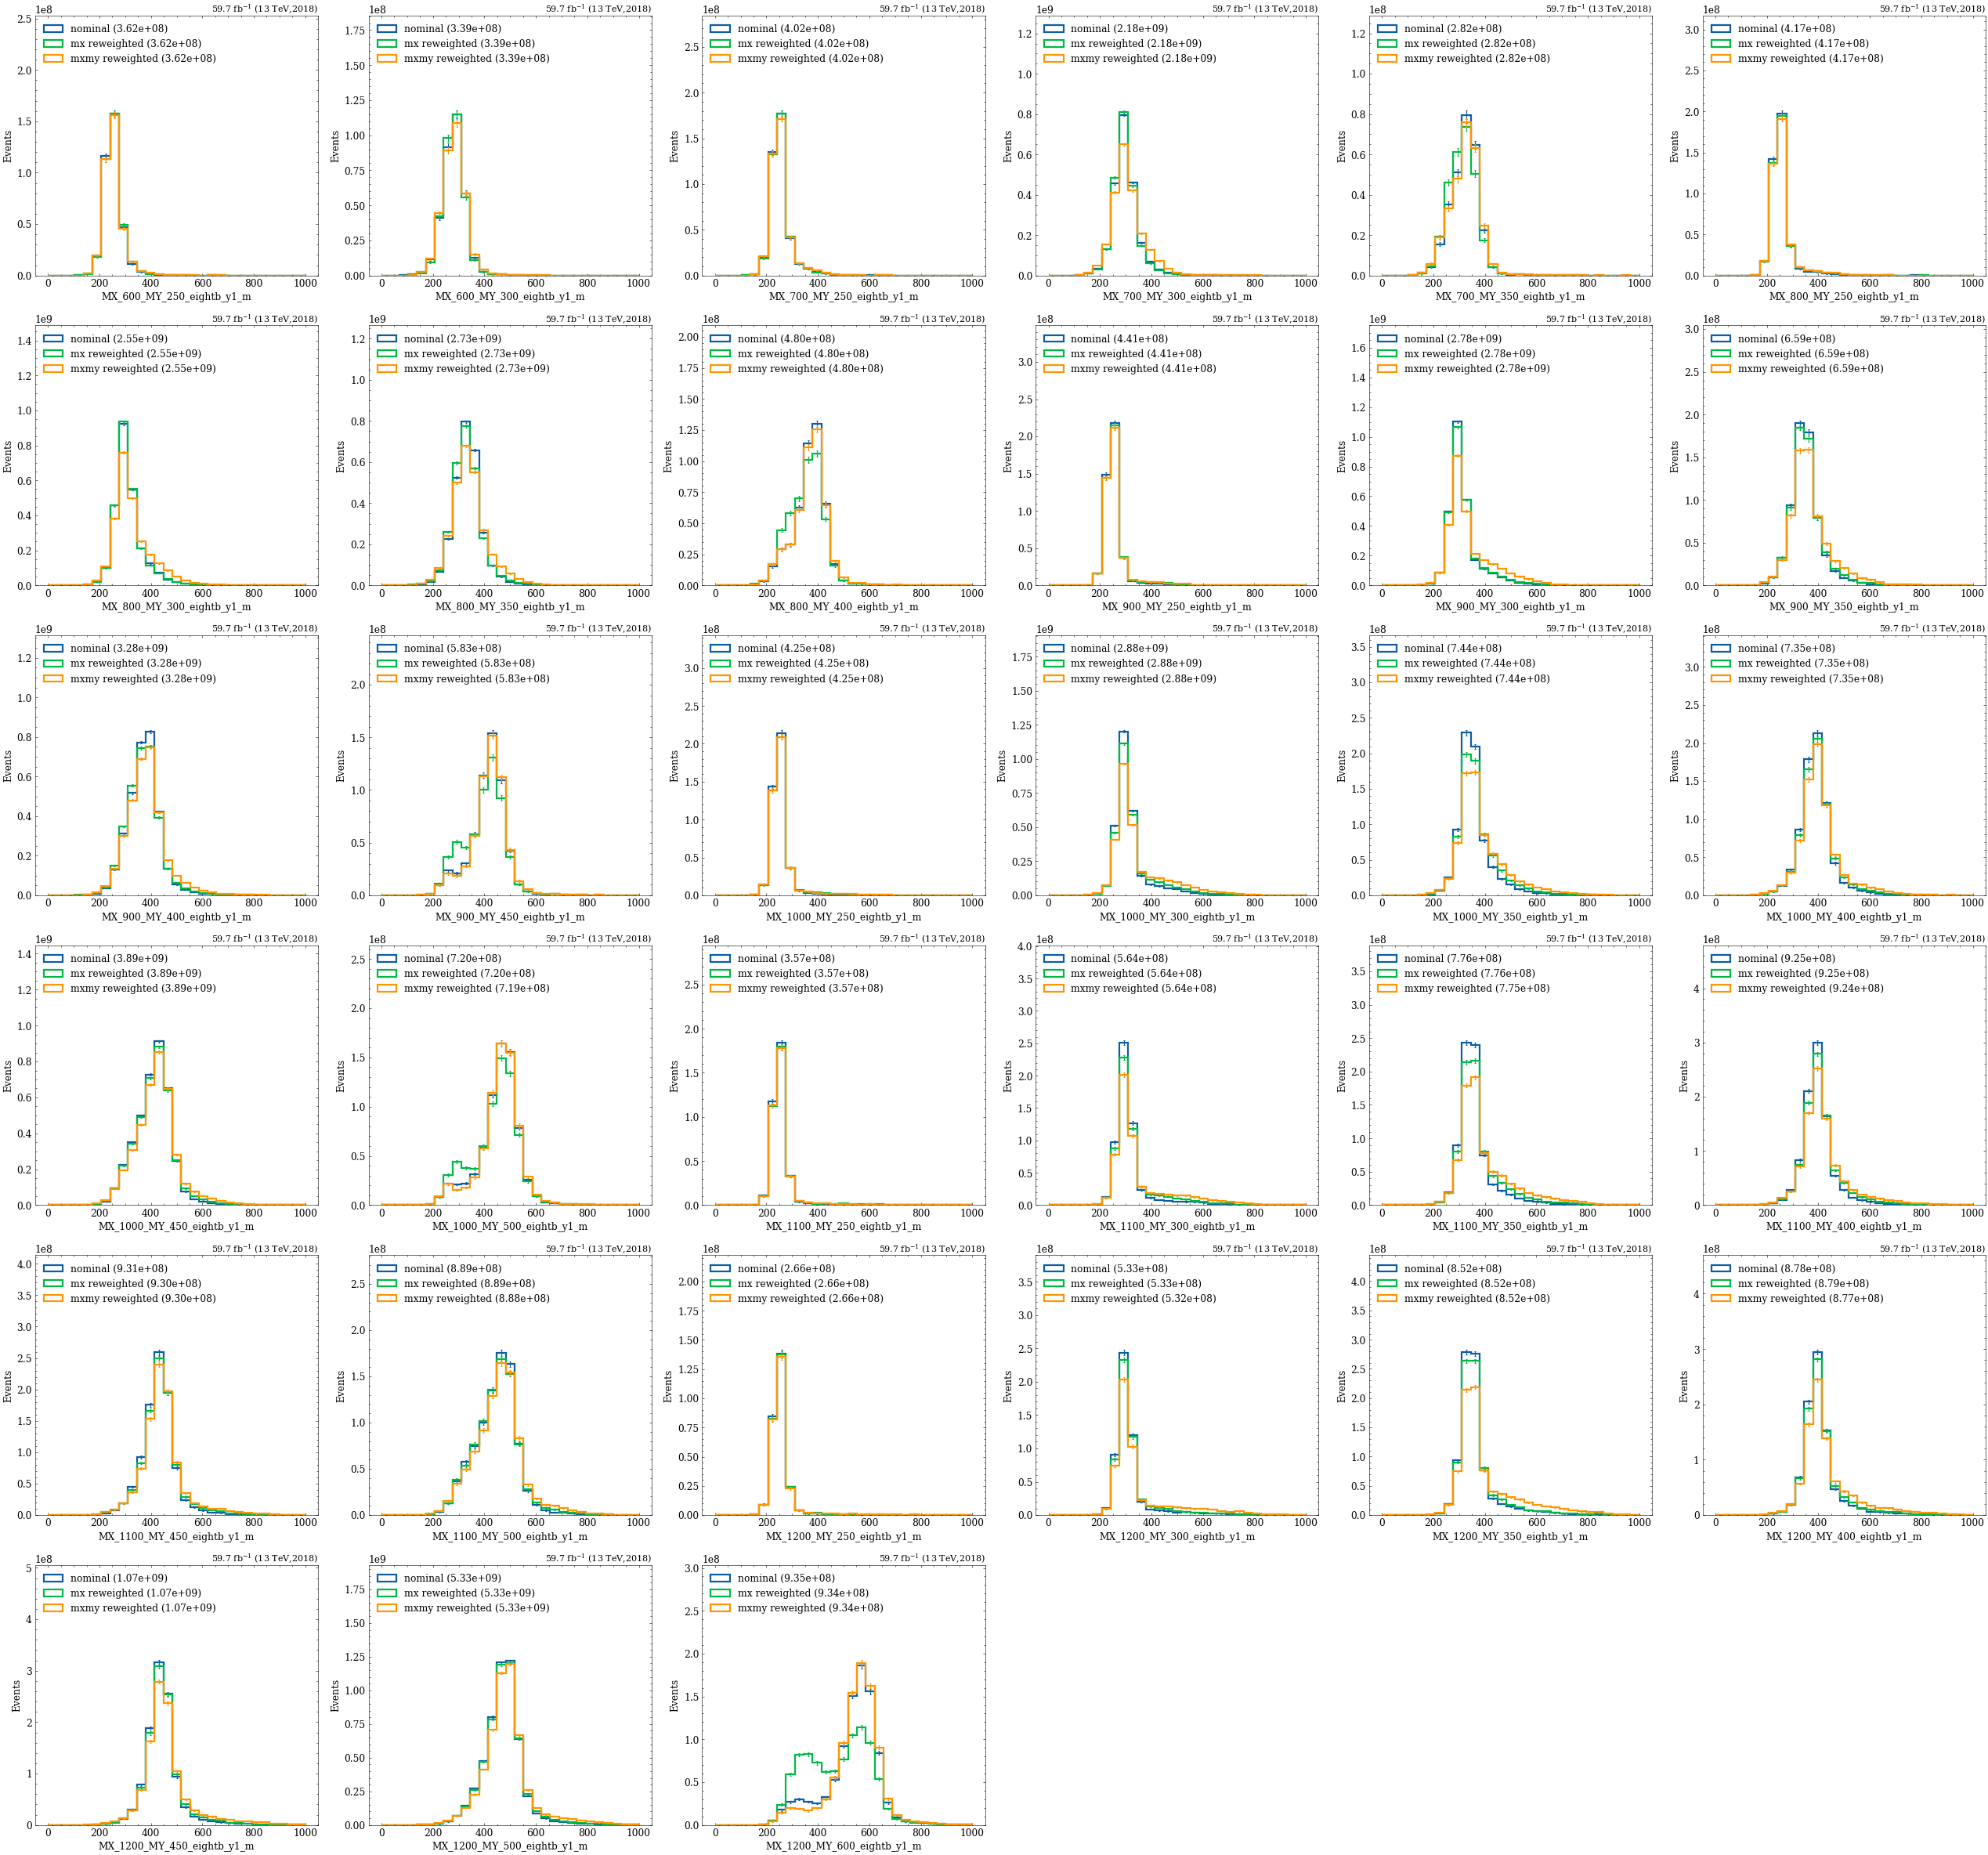

In [29]:
study.h_quick(
    [nominal, mx_reweight, mxmy_reweight],
    label=['nominal','mx reweighted','mxmy reweighted'],
    stacked=False,
    varlist=[f'{mass}_eightb_y1_m' for mass in masses]+[None]*3,
    legend=True,
)

100%|██████████| 36/36 [01:46<00:00,  2.97s/it]


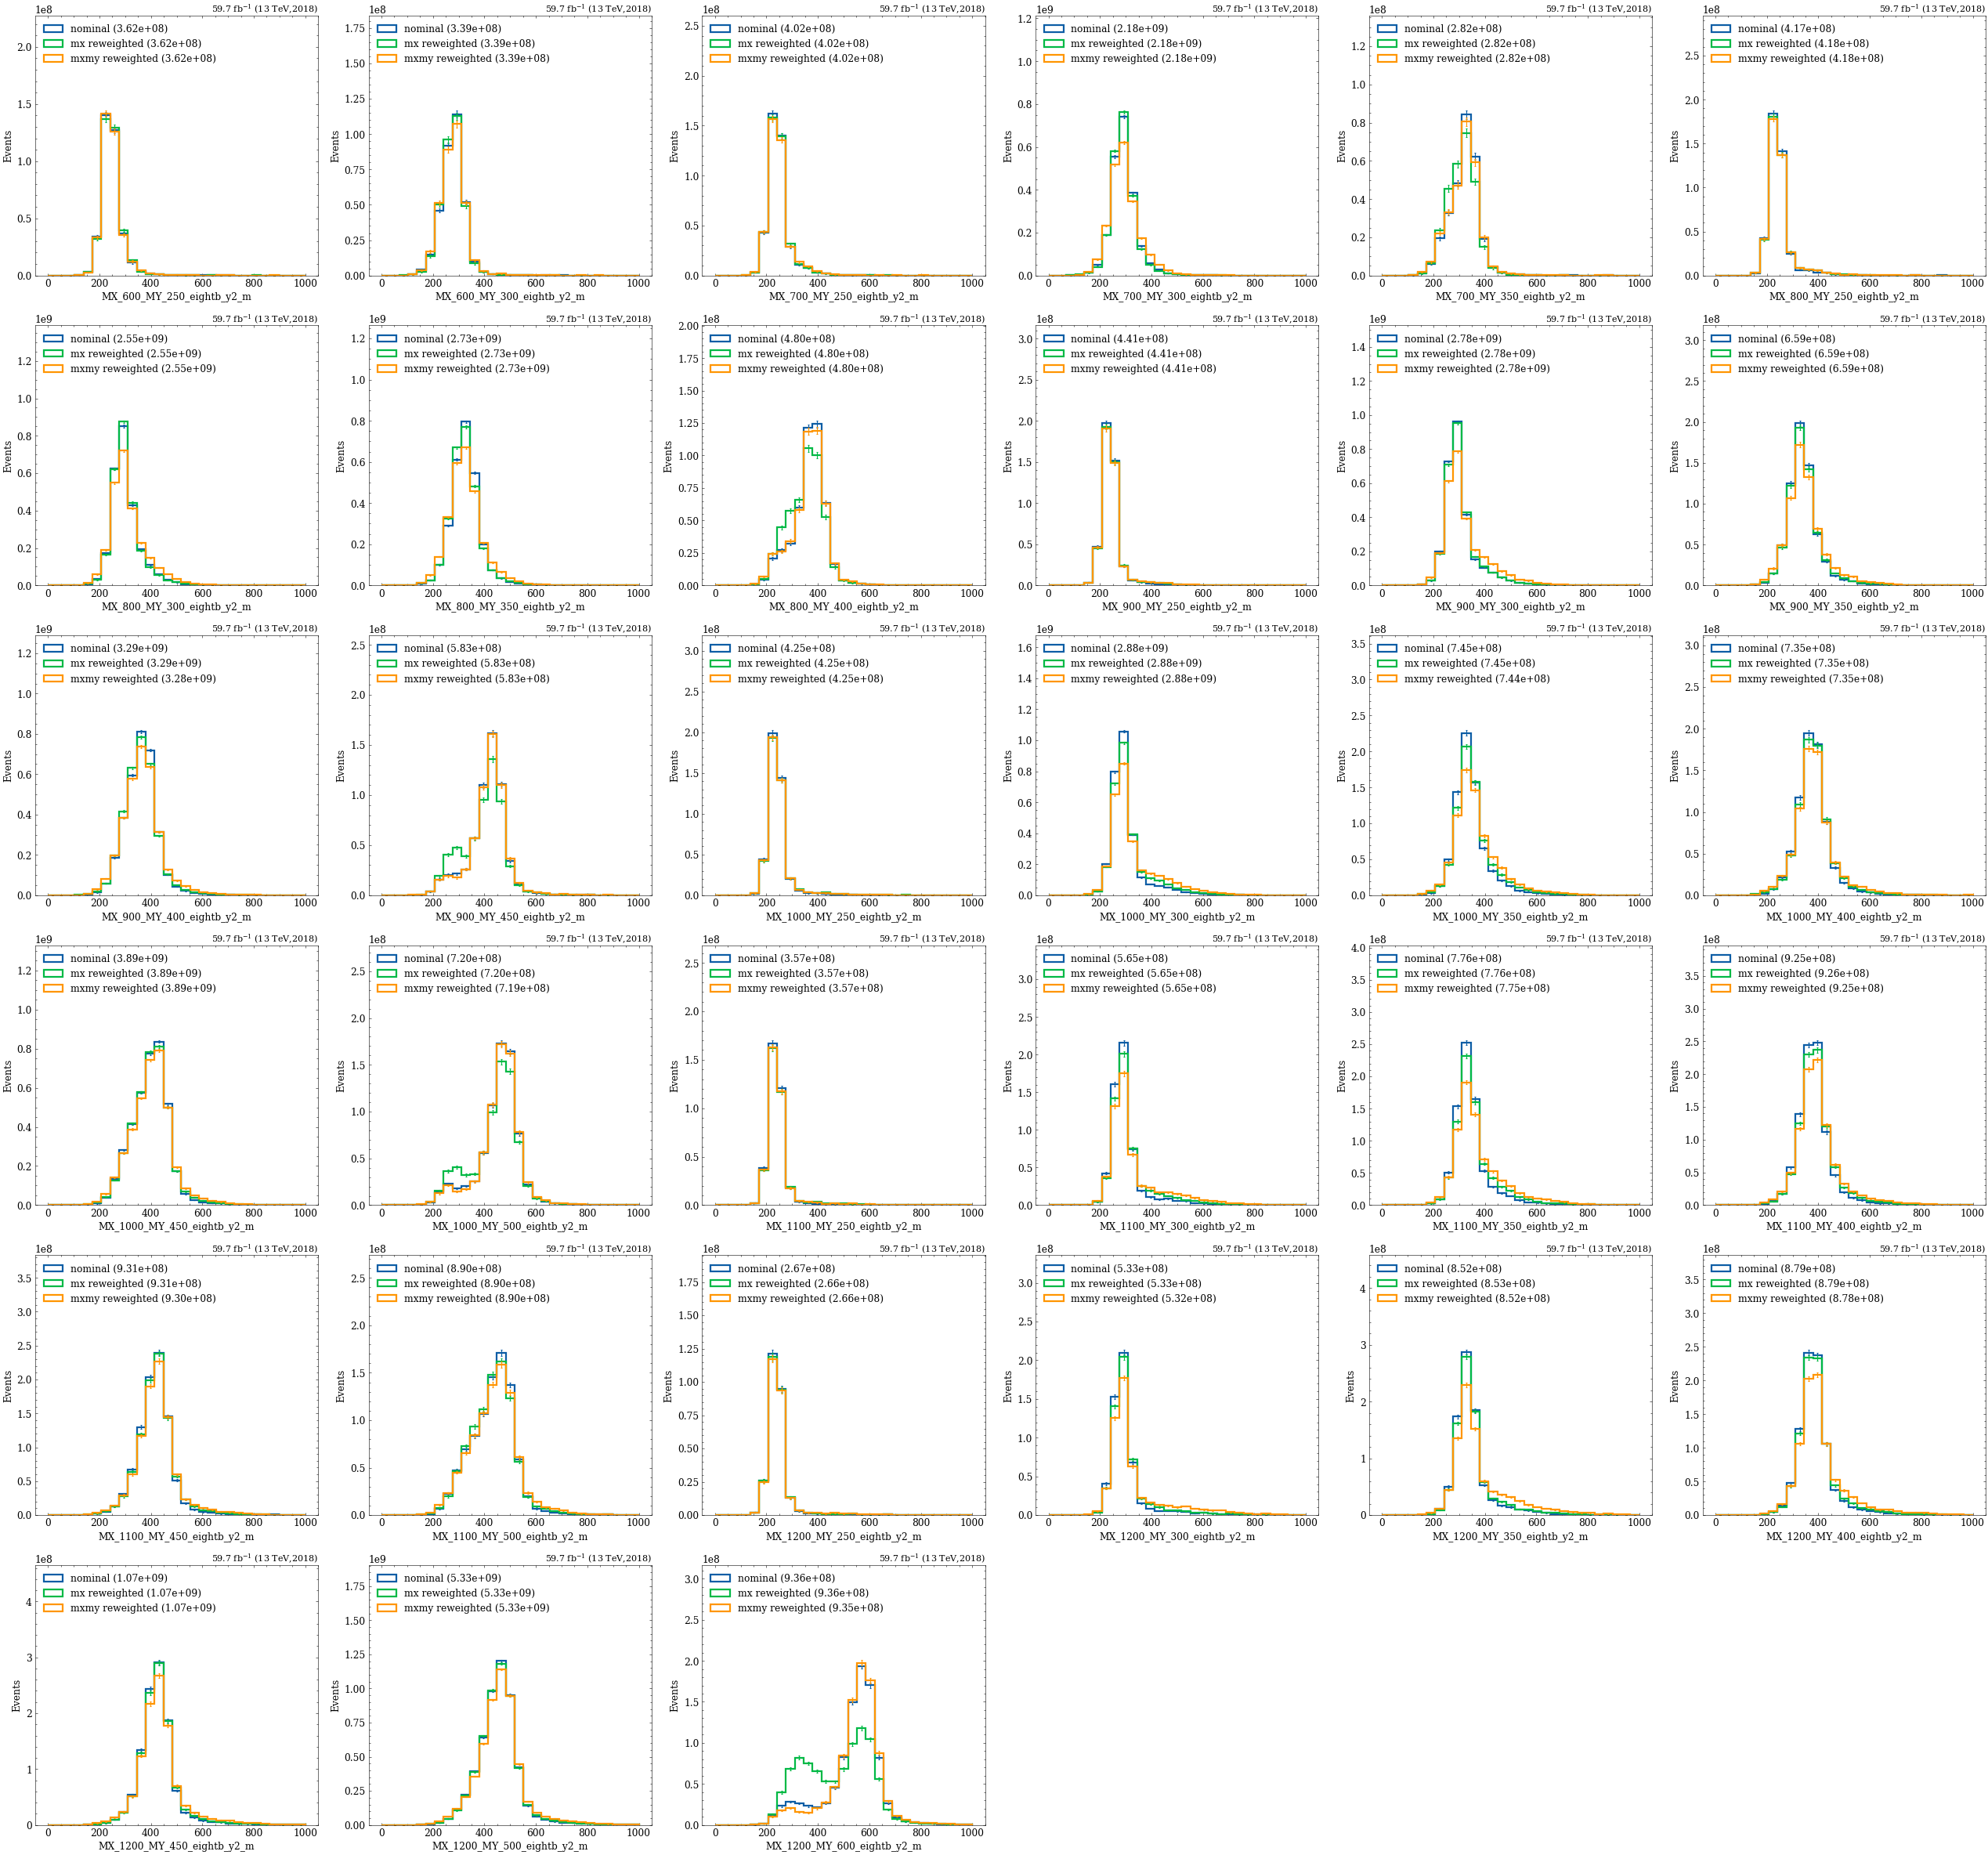

In [30]:
study.h_quick(
    [nominal, mx_reweight, mxmy_reweight],
    label=['nominal','mx reweighted','mxmy reweighted'],
    stacked=False,
    varlist=[f'{mass}_eightb_y2_m' for mass in masses]+[None]*3,
    legend=True,
)

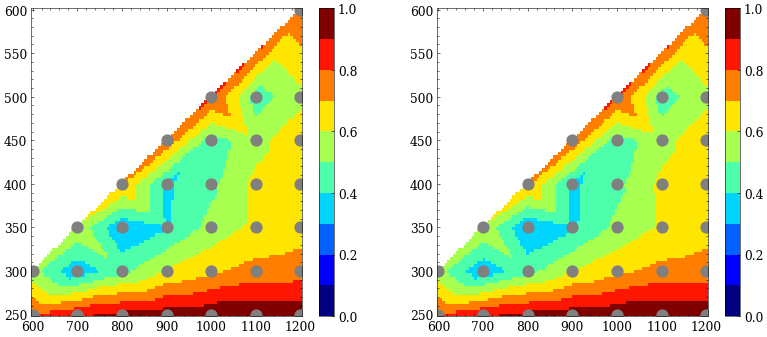

In [4]:
fig, axs = study.get_figax(nvar=2)
for i in range(2):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_y_eff[:,i],
        zlim=np.linspace(0,1,11),
        g_cmap='jet',
        figax=(fig, axs.flat[i])
    )

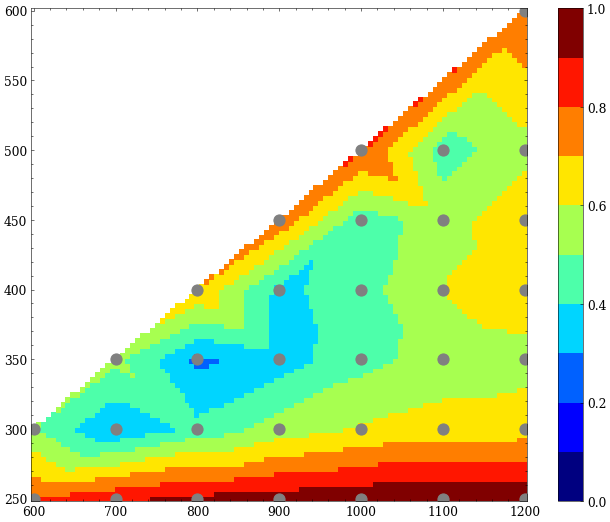

In [5]:
study.mxmy_reduction(
    tree,
    f_var=lambda t : t.eightb_x_eff,
    zlim=np.linspace(0,1,11),
    g_cmap='jet',
)

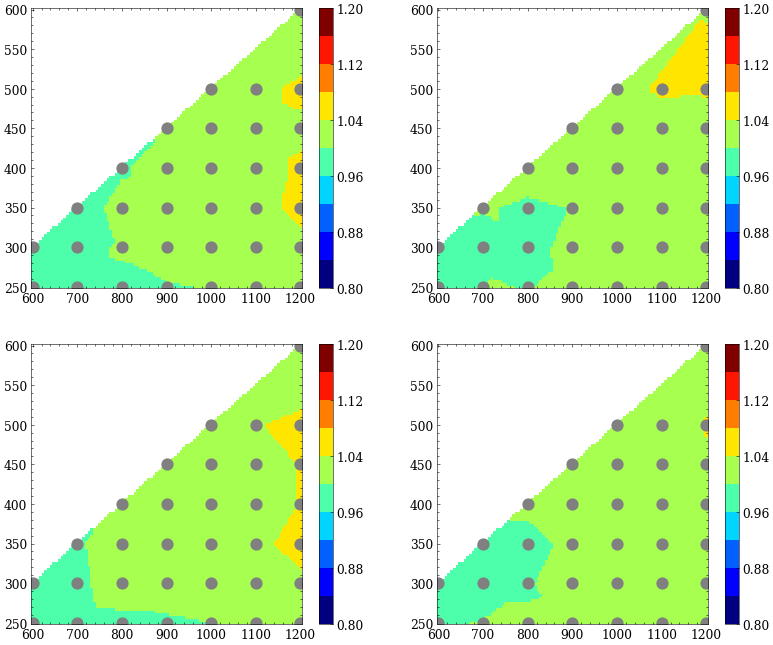

In [6]:
fig, axs = study.get_figax(nvar=4)
for i in range(4):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_h_res[:,i],
        zlim=np.linspace(0.8,1.2,11),
        g_cmap='jet',
        figax=(fig, axs.flat[i])
    )

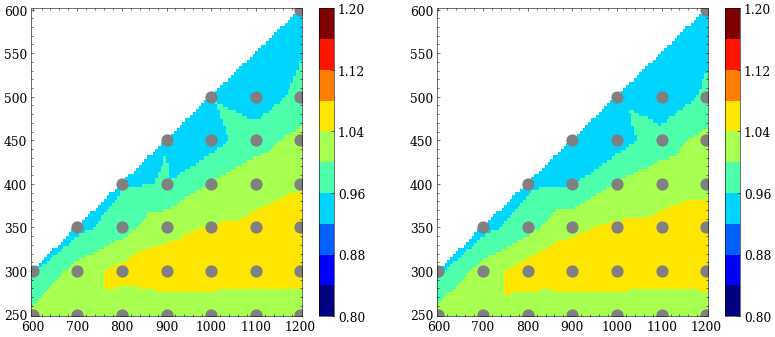

In [7]:
fig, axs = study.get_figax(nvar=2)
for i in range(2):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_y_res[:,i],
        zlim=np.linspace(0.8,1.2,11),
        g_cmap='jet',
        figax=(fig, axs.flat[i])
    )

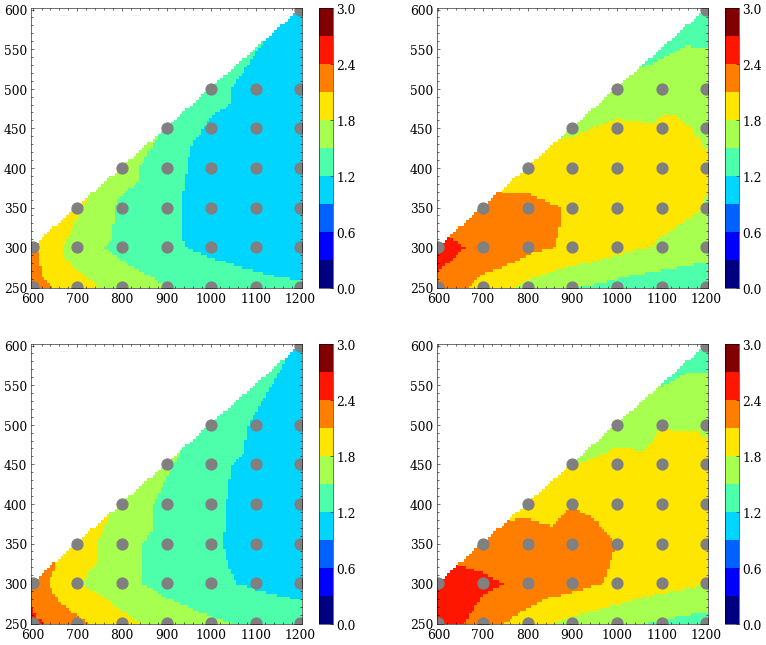

In [10]:
fig, axs = study.get_figax(nvar=4)
for i in range(4):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_h_dr[:,i],
        zlim=np.linspace(0,3,11),
        g_cmap='jet',
        figax=(fig, axs.flat[i])
    )

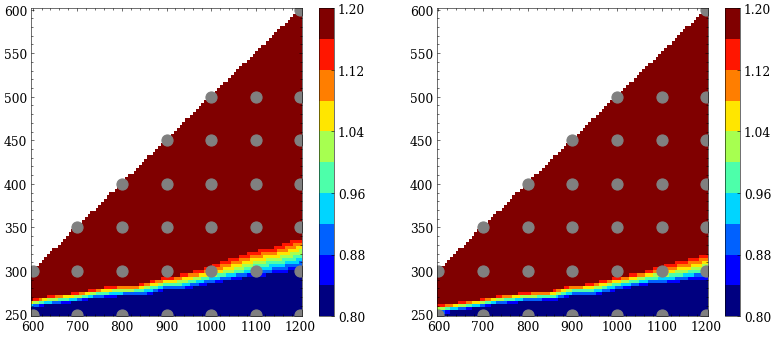

In [11]:
fig, axs = study.get_figax(nvar=2)
for i in range(2):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_y_dr[:,i],
        zlim=np.linspace(0.8,1.2,11),
        g_cmap='jet',
        figax=(fig, axs.flat[i])
    )

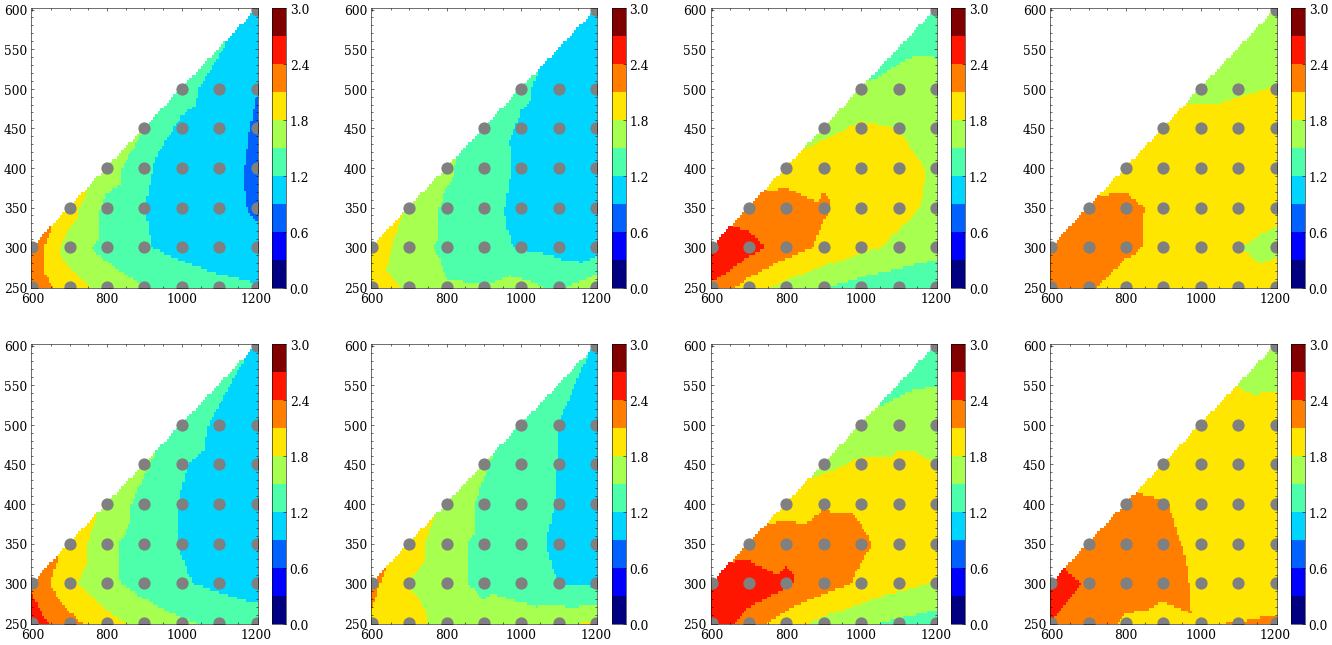

In [16]:
fig, axs = study.get_figax(nvar=8)
for i in range(4):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_corr_h_dr[:,i],
        zlim=np.linspace(0,3,11),
        g_cmap='jet',
        figax=(fig, axs.flat[2*i])
    )
    
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_incorr_h_dr[:,i],
        zlim=np.linspace(0,3,11),
        g_cmap='jet',
        figax=(fig, axs.flat[2*i+1])
    )

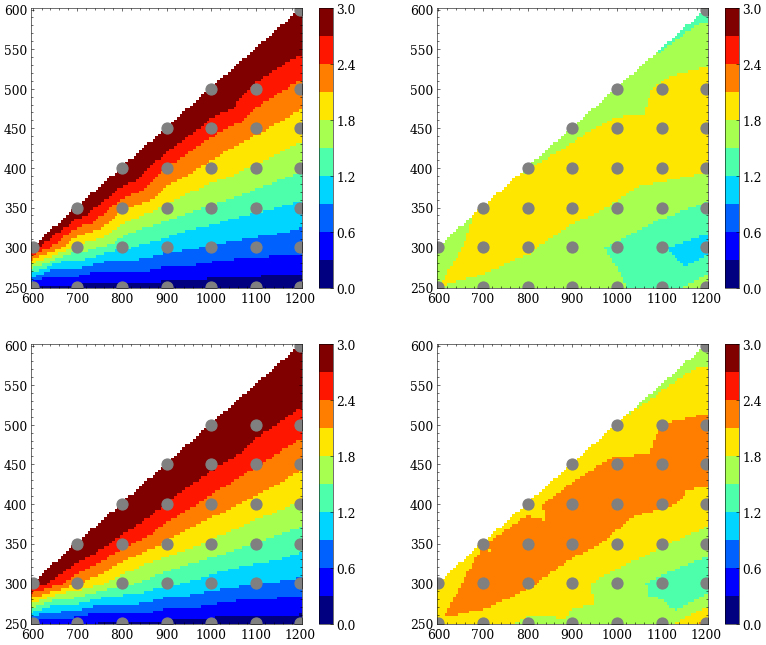

In [20]:
fig, axs = study.get_figax(nvar=4)
for i in range(2):
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_corr_y_dr[:,i],
        zlim=np.linspace(0,3,11),
        g_cmap='jet',
        figax=(fig, axs.flat[2*i])
    )
    study.mxmy_reduction(
        tree,
        f_var=lambda t : t.eightb_incorr_y_dr[:,i],
        zlim=np.linspace(0,3,11),
        g_cmap='jet',
        figax=(fig, axs.flat[2*i+1])
    )